## CHAPTER 9

# Plotting and Visualization


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# %matplotlib inline

## 9.1 A Brief matplotlib API Primer


In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

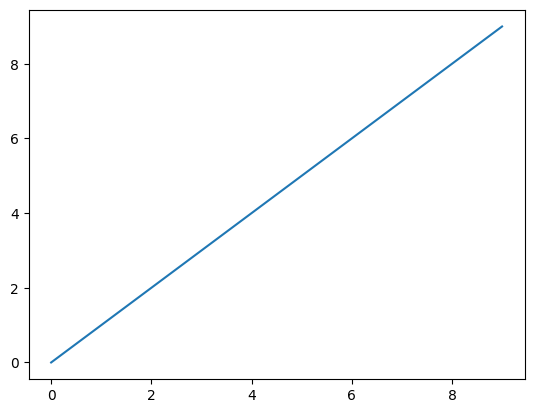

In [4]:
plt.plot(data)

### Figures and Subplots


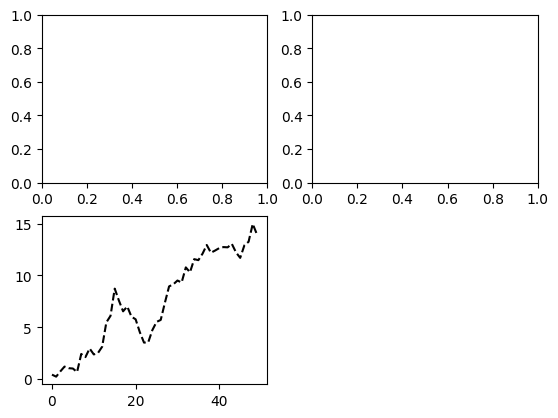

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")
# One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so you must put all of the plotting commands in a single notebook cell.

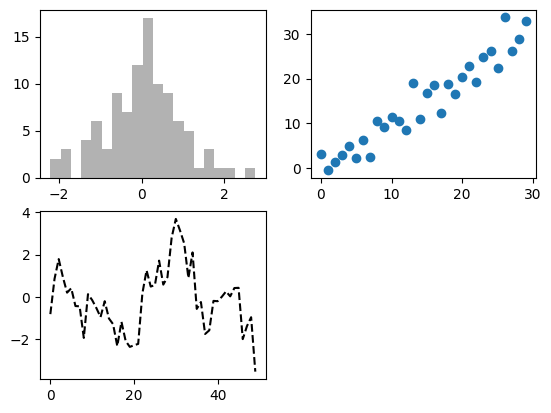

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

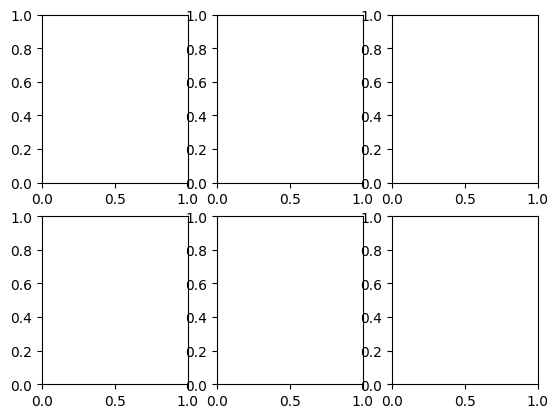

In [7]:
fig, axes = plt.subplots(2, 3)
axes

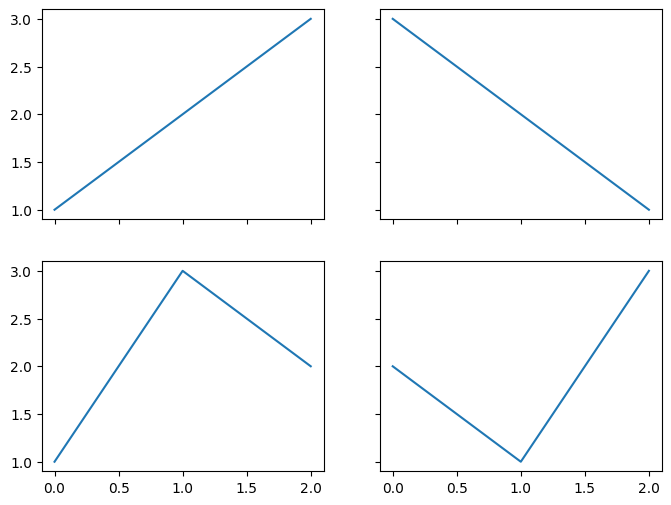

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 6))

axes[0, 0].plot([1, 2, 3])
axes[0, 1].plot([3, 2, 1])
axes[1, 0].plot([1, 3, 2])
axes[1, 1].plot([2, 1, 3])

### Adjusting the spacing around subplots


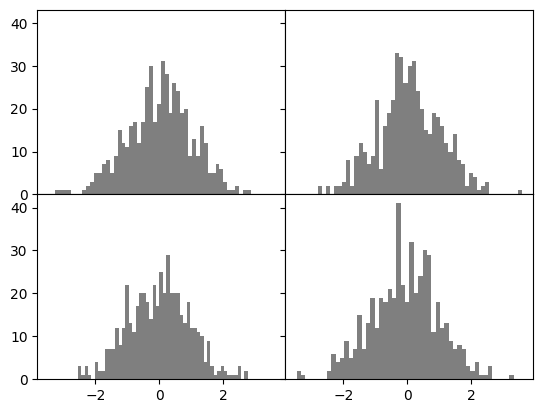

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(
            np.random.standard_normal(500), bins=50, color="black", alpha=0.5
        )
fig.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles


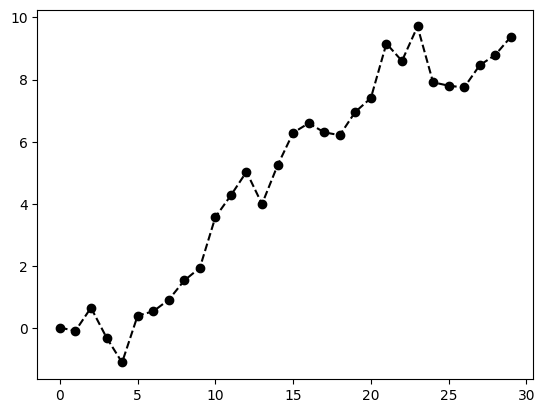

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(
    np.random.standard_normal(30).cumsum(),
    color="black",
    linestyle="dashed",
    marker="o",
)

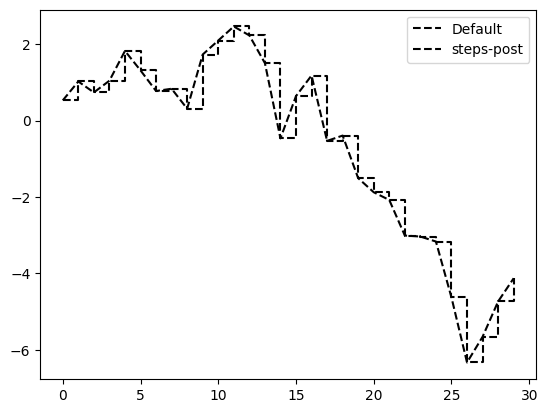

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(
    data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post"
)
ax.legend()

### Ticks, Labels, and Legends


Text(0.5, 1.0, 'My First Matplotlib Plot')

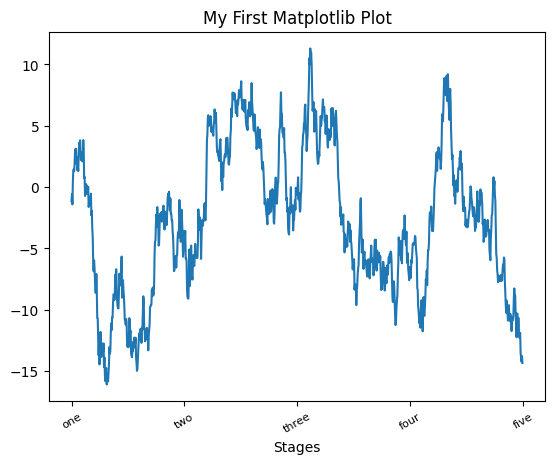

In [12]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(
    ["one", "two", "three", "four", "five"], rotation=30, fontsize=8
)
ax.set_xlabel("Stages")
ax.set_title("My First Matplotlib Plot")
# ax.set(title="My first matplotlib plot", xlabel="Stages")

#### Adding legends


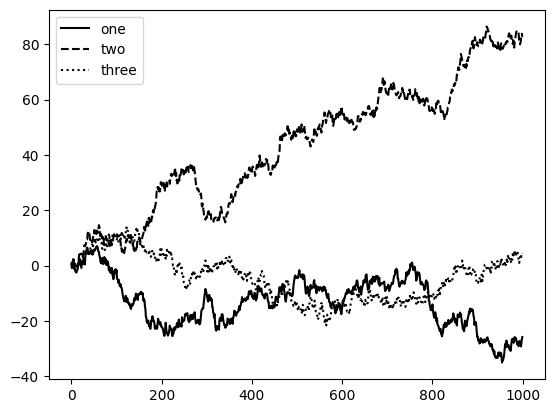

In [13]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum(), color="black", label="one")
ax.plot(
    np.random.standard_normal(1000).cumsum(),
    color="black",
    label="two",
    linestyle="dashed",
)
ax.plot(
    np.random.standard_normal(1000).cumsum(),
    color="black",
    label="three",
    linestyle="dotted",
)
ax.legend()

### Annotations and Drawing on a Subplot


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

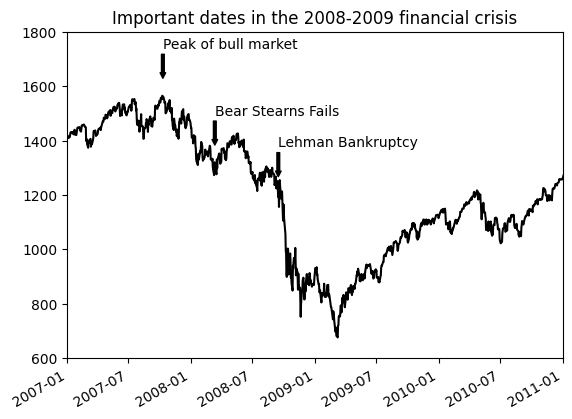

In [14]:
from datetime import datetime

fig, ax = plt.subplots()
data = pd.read_csv("ch09/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]
spx.plot(ax=ax, color="black")
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy"),
]
for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
        horizontalalignment="left",
        verticalalignment="top",
    )
    # Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

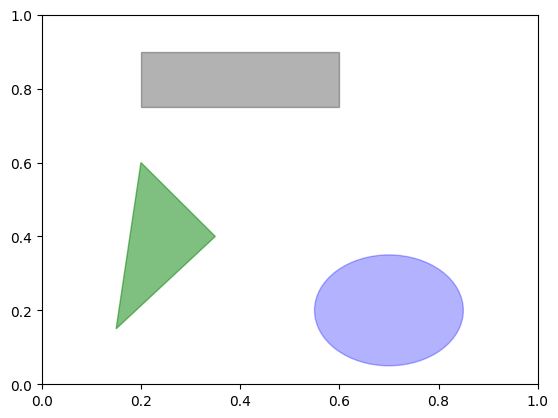

In [15]:
fig, ax = plt.subplots()
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
# Saving Plots to File
fig.savefig("figpath.png")
fig.savefig("figpath1.png", dpi=400)


### matplotlib Configuration

In [16]:
# plt.rcParams
plt.rc("figure", figsize=(10, 10))
plt.rc("font", family="monospace", weight="bold", size=8)
plt.rcdefaults()  # reset to default

## 9.2 Plotting with pandas and seaborn

### Line Plots

<Axes: >

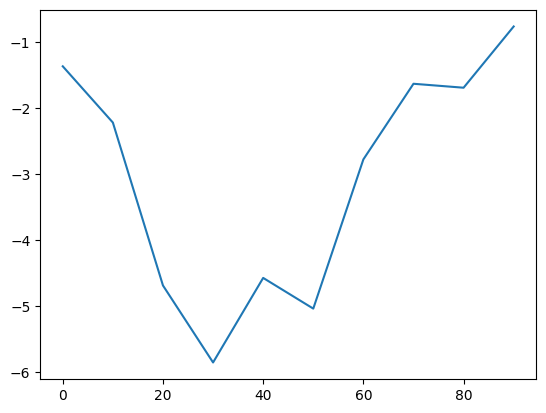

In [17]:
s = pd.Series(np.random.standard_normal(10).cumsum(),
              index=np.arange(0, 100, 10))
s.plot()

<Axes: >

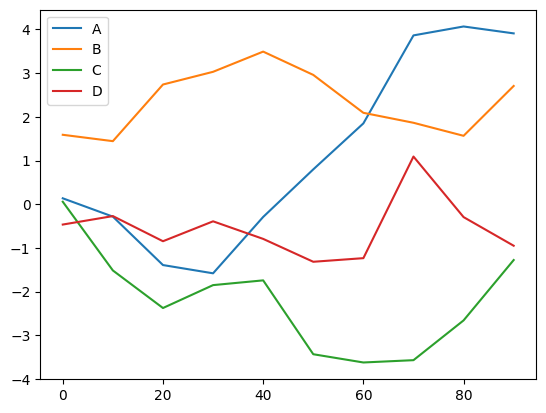

In [18]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(axis=0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
# plt.style.use("grayscale")
df.plot()

### Bar Plots

<Axes: >

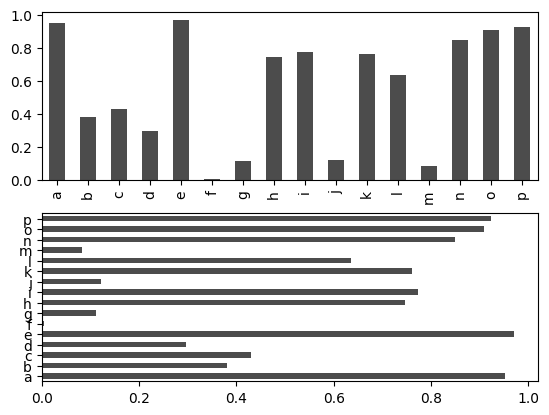

In [19]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), 
                 index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

<Axes: >

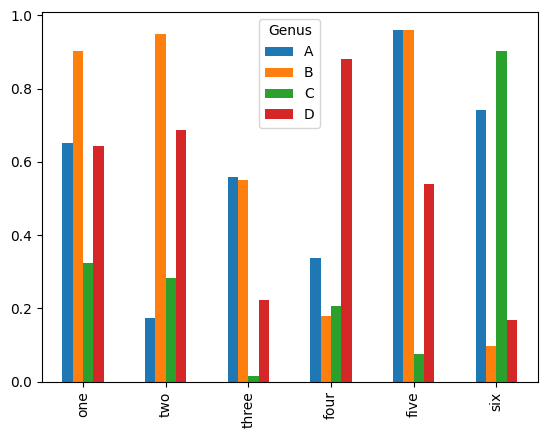

In [20]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df
df.plot.bar()

<Axes: >

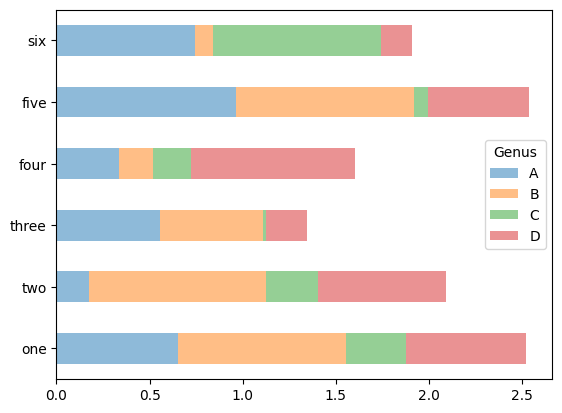

In [21]:
df.plot.barh(stacked=True, alpha=0.5)

In [22]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [23]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [24]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [25]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

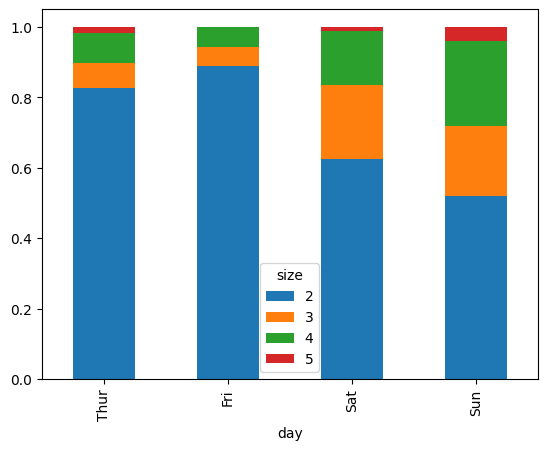

In [26]:
party_pcts.plot.bar(stacked=True)

In [27]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

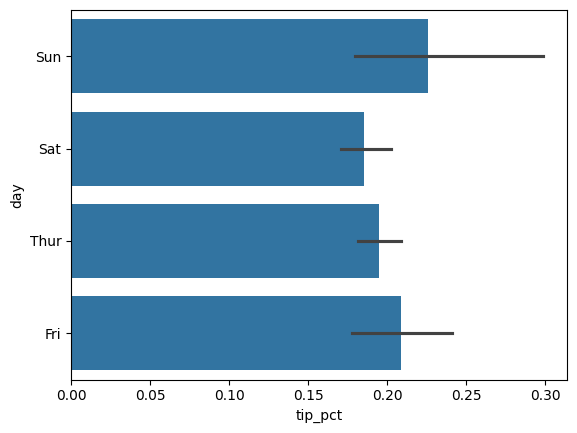

In [28]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")


<Axes: xlabel='tip_pct', ylabel='day'>

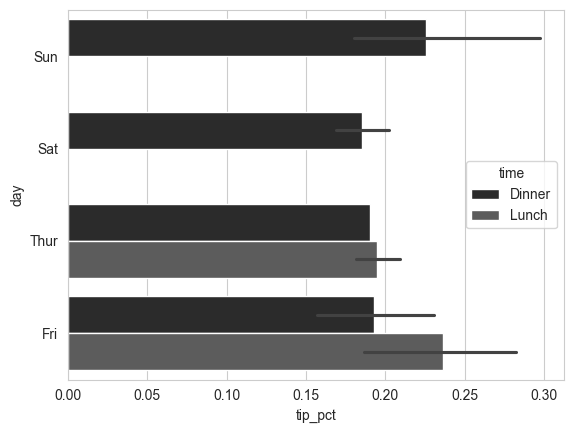

In [29]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")
sns.barplot(y="day", x="tip_pct", data=tips, orient="h", hue="time")

### Histograms and Density Plots

<Axes: ylabel='Frequency'>

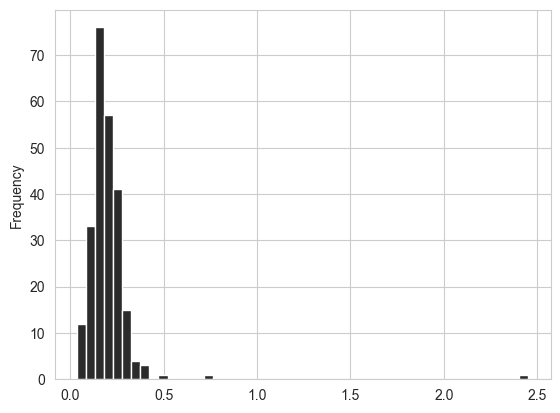

In [30]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

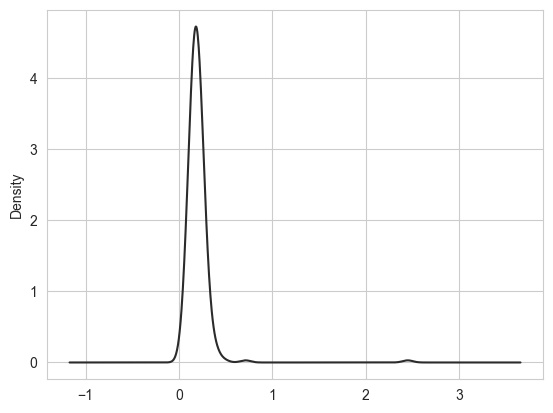

In [31]:
# pip install scipy
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

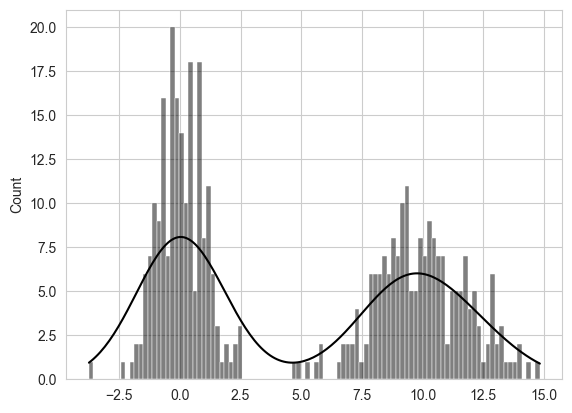

In [32]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, kde=True, color="black")

### Scatter or Point Plots

In [33]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


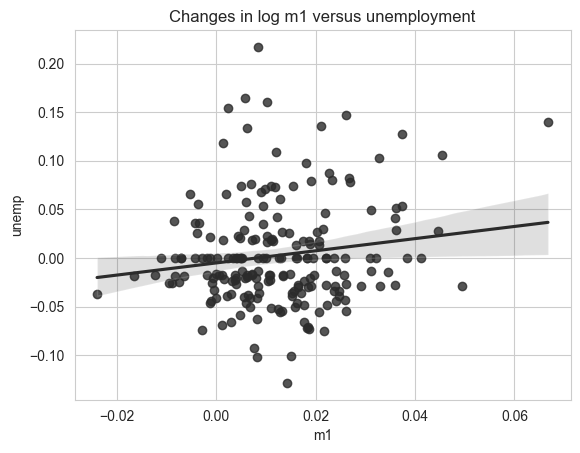

In [34]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.title.set_text("Changes in log m1 versus unemployment")

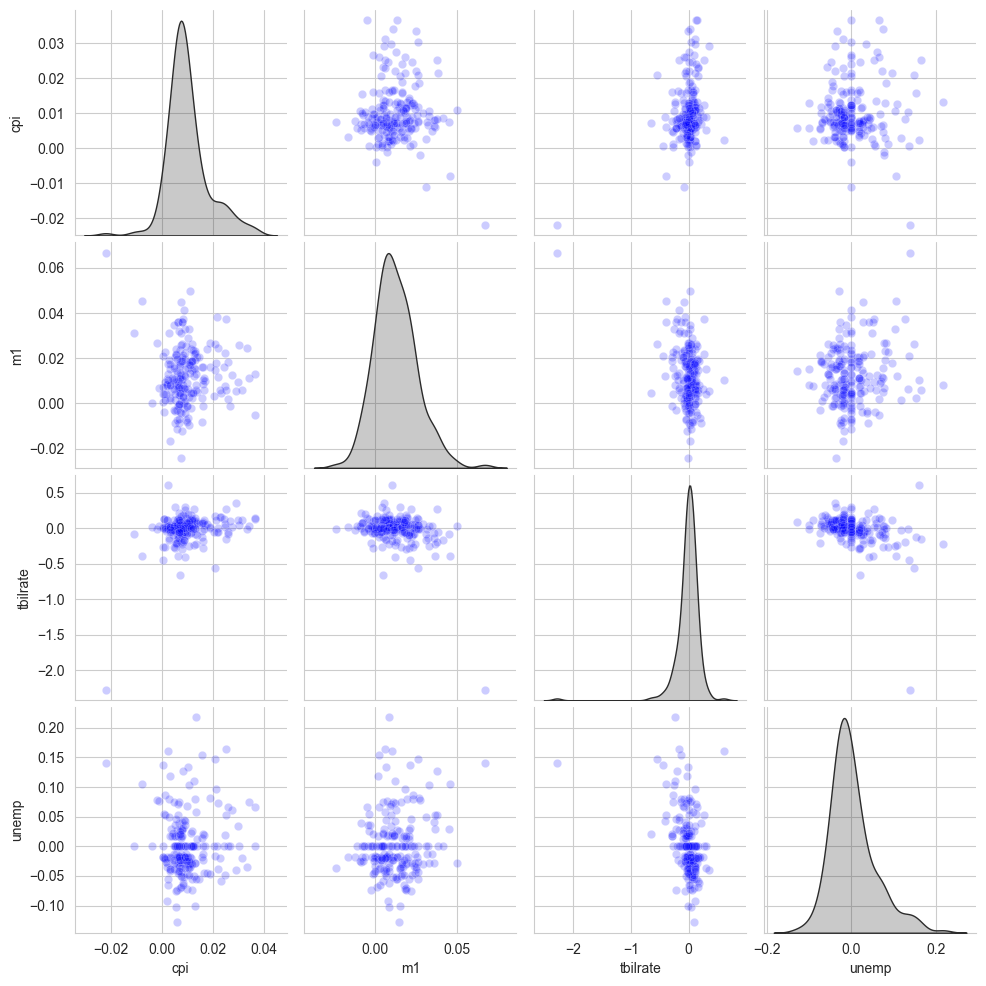

In [35]:
sns.pairplot(trans_data, diag_kind="kde", 
             plot_kws={"alpha": 0.2, "color": "blue"})
# diag_kind="kde"
# Diagonal-এর প্লট কেমন হবে সেটা বলে দেয়

In [36]:
trans_data.corr()

,cpi,m1,tbilrate,unemp
cpi,1.000000,-0.050535,0.329456,0.019750
m1,-0.050535,1.000000,-0.360278,0.150729
tbilrate,0.329456,-0.360278,1.000000,-0.371491
unemp,0.019750,0.150729,-0.371491,1.000000


### Facet Grids and Categorical Data

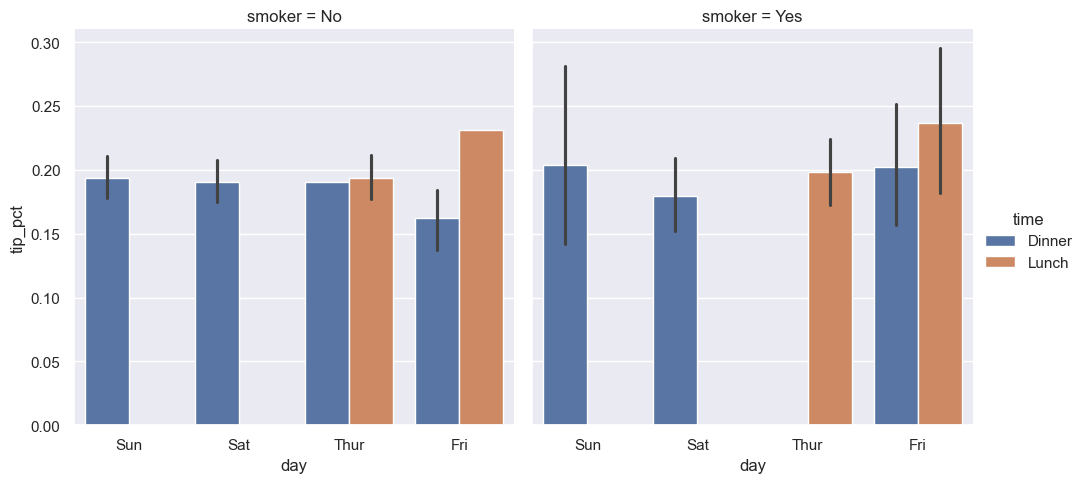

In [ ]:
sns.set_theme() # set_theme() must be called before any plotting functions
sns.catplot(
    x="day",
    y="tip_pct",
    hue="time",
    data=tips[tips.tip_pct < 1],
    kind="bar",
    col="smoker",
)

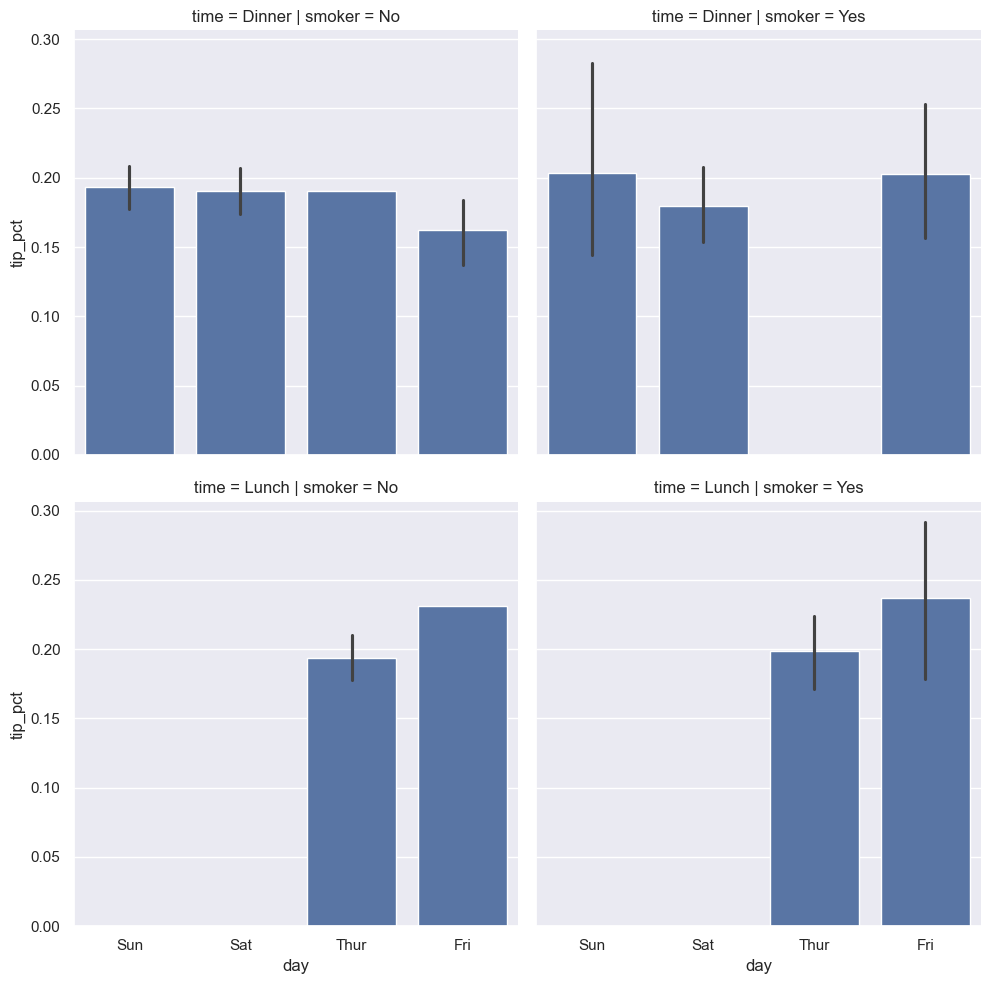

In [39]:
sns.catplot(
    x="day",
    y="tip_pct",
    row="time",
    col="smoker",
    kind="bar",
    data=tips[tips.tip_pct < 1],
)

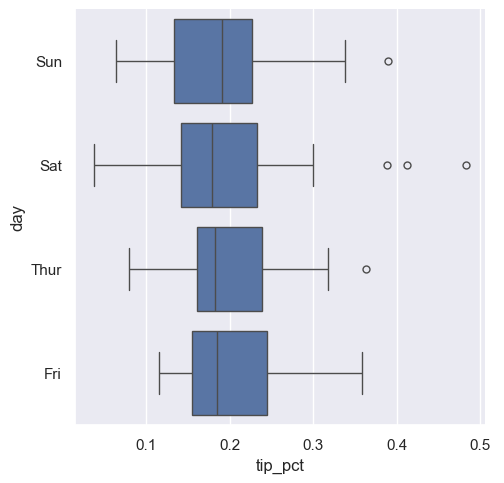

In [40]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])


## 9.4 Conclusion
The goal of this chapter was to get your feet wet with some basic data visualization using pandas, matplotlib, and seaborn. If visually communicating the results of data analysis is important in your work, I encourage you to seek out resources to learn more about effective data visualization. It is an active field of research, and you can practice with many excellent learning resources available online and in print.